In [7]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras_utils import detect_lp
from os.path import splitext,basename
from keras.models import model_from_json
import glob
from utils import im2single
from label 					import Shape, writeShapes


def load_model(path):
    try:
        path = splitext(path)[0]
        with open('%s.json' % path, 'r') as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json, custom_objects={})
        model.load_weights('%s.h5' % path)
        print("Loading model successfully...")
        return model
    except Exception as e:
        print(e)

wpod_net_path = "wpod-net.json"
wpod_net = load_model(wpod_net_path)
image_paths = glob.glob("Plate_examples/*.jpg")

def preprocess_image(image_path,resize=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    if resize:
        img = cv2.resize(img, (224,224))
    return img


Loading model successfully...


		Bound dim: 476, ratio: 1.604520
Detect 1 plate(s) in usa_motor_plate
Coordinate of plate(s) in image: 
 [[0.36040854 0.65086708 0.64952488 0.35906633]
 [0.64088295 0.65041534 0.87961086 0.87007847]]
Array for image 80 [array([[[0.11551011, 0.14442402, 0.10041361],
        [0.12856925, 0.15723039, 0.11945466],
        [0.14109989, 0.16933978, 0.13802083],
        ...,
        [0.22598806, 0.20000766, 0.21848959],
        [0.22323835, 0.19517463, 0.21867341],
        [0.2247549 , 0.19534314, 0.2252451 ]],

       [[0.08897825, 0.11648284, 0.08632047],
        [0.11079963, 0.13468137, 0.1147978 ],
        [0.13237593, 0.1523476 , 0.14401042],
        ...,
        [0.219087  , 0.19310662, 0.21770833],
        [0.21962315, 0.19155943, 0.21836703],
        [0.22181374, 0.19240198, 0.22426471]],

       [[0.12303156, 0.14580269, 0.13340227],
        [0.17578891, 0.19482231, 0.19498315],
        [0.22888711, 0.24463847, 0.25632277],
        ...,
        [0.21295957, 0.18826593, 0.21697304],


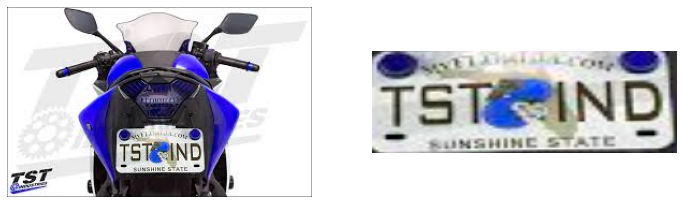

In [38]:
lp_threshold=0.5
def get_plate(image_path, Dmax=608, Dmin=256):
    Ivehicle = cv2.imread(image_path)
    ratio = float(max(Ivehicle.shape[:2]))/min(Ivehicle.shape[:2])
    side  = int(ratio*288.)
    bound_dim = min(side + (side%(2**4)),608)
    print ("\t\tBound dim: %d, ratio: %f" % (bound_dim,ratio))

    Llp,LlpImgs,_ = detect_lp(wpod_net,im2single(Ivehicle),bound_dim,2**4,(240,80),lp_threshold)

    return Llp, LlpImgs

# Obtain plate image and its coordinates from an image
test_image = image_paths[2]
coords,colors = get_plate(test_image)
print("Detect %i plate(s) in"%len(coords),splitext(basename(test_image))[0])
print("Coordinate of plate(s) in image: \n", coords[0].pts)
print("Array for image", len(colors[0]), colors)

# Visualize our result
img1 = cv2.imread(test_image)
# img2 = img1[center_x-range_x/2:center_x+range_x/2, center_y-range_y/2:center_y+range_y/2]
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(colors[0])

#plt.savefig("part1_result.jpg",dpi=300)